In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the CSV file with tab delimiter
file_path = 'Tamil_first_ready_for_sentiment.csv'
df = pd.read_csv(file_path, delimiter='\t', names=['category', 'text'])

# Problem Understanding
# The dataset contains text data with corresponding category labels
print("Dataset Overview:")
print(df.head())


Dataset Overview:
    category                                               text
0  Negative                Enna da ellam avan seyal  Mari iruku
1  Negative           This movei is just like  ellam avan seyal
2  Positive    Padam vanthathum 13k dislike pottavaga yellam...
3  Positive     Neraya neraya neraya... ... V era level...thala
4  Positive    wow thavala sema mass....padam oru pundaikum ...


In [3]:
# Check for null values
print("\nChecking for null values:")
print(df.isnull().sum())



Checking for null values:
category    0
text        0
dtype: int64


In [4]:
# Data Pre-Processing
# Encode category labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])


In [5]:
# Convert the text data to numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])
y = df['category_encoded']


In [6]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Apply Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [8]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6795808193077167

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.02      0.03       377
           1       0.61      0.12      0.20       425
           2       0.68      0.98      0.81      2062
           3       0.85      0.39      0.53       114
           4       0.61      0.08      0.14       171

    accuracy                           0.68      3149
   macro avg       0.61      0.32      0.34      3149
weighted avg       0.63      0.68      0.58      3149



In [9]:
# Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.68529692 0.68497936 0.68180375 0.6805335  0.68678526]
Average Cross-Validation Score: 0.6838797577174013


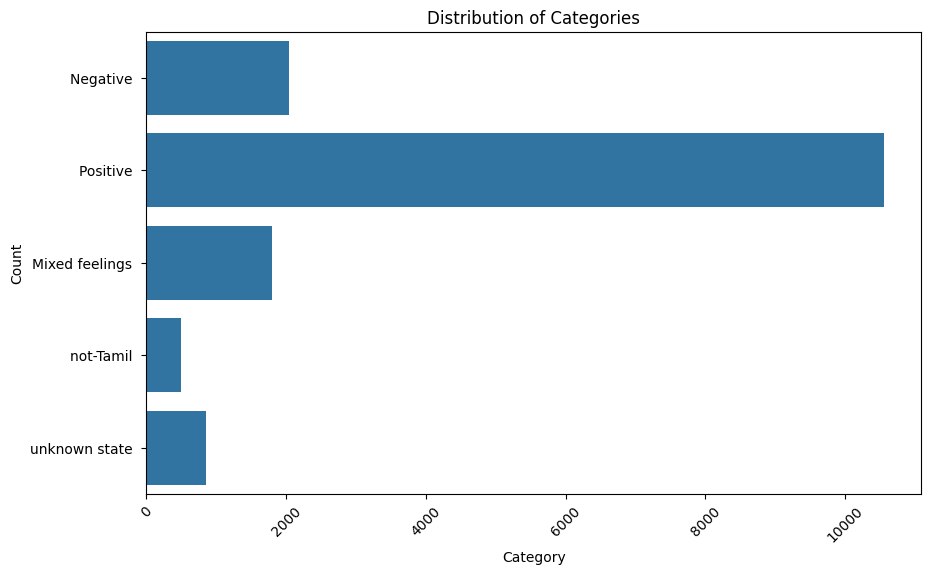

In [10]:
# Visualization
# Plotting the distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(df['category'])
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


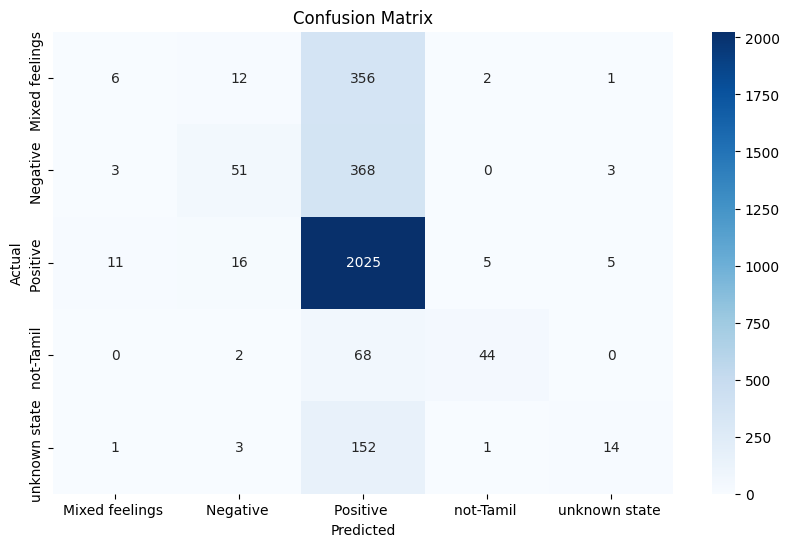

In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
